# Projeto 1 - Ciência dos Dados

**Aluno:** Beni Stern



**Pergunta:** Em países com maior idh, o numero de estradas é maior do que os de menor idh e será que o saneamento básico afeta o idh do país

In [65]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [66]:
hdi = pd.read_excel('hdi.xlsx')
roads = pd.read_excel('roads.xlsx')
sanitation = pd.read_excel('sanitation.xlsx')
hdi.head()
#roads.head()
#sanitation.head()

,geo,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Afghanistan,0.295,0.300,0.309,0.305,0.300,0.324,0.328,0.332,0.335,...,0.415,0.433,0.434,0.448,0.454,0.463,0.470,0.476,0.479,0.479
1,Albania,0.635,0.618,0.603,0.608,0.616,0.628,0.637,0.636,0.646,...,0.703,0.713,0.721,0.725,0.738,0.752,0.759,0.761,0.762,0.764
2,Algeria,0.577,0.581,0.587,0.591,0.595,0.600,0.609,0.617,0.627,...,0.690,0.697,0.705,0.714,0.724,0.732,0.737,0.741,0.743,0.745
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.819,0.819,0.843,0.850,0.857,0.858
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.454,0.468,0.480,0.488,0.495,0.508,0.523,0.527,0.531,0.533


In [67]:
hdi_2009 = hdi.loc[:, ["geo", 2009]]
hdi_2009.head()

,geo,2009
0,Afghanistan,0.448
1,Albania,0.725
2,Algeria,0.714
3,Andorra,NaN
4,Angola,0.488


In [68]:
roads_2009 = roads.loc[:, ["geo", 2009]]
roads_2009.head()

,geo,2009
0,Afghanistan,NaN
1,Albania,NaN
2,Algeria,74.0
3,Angola,NaN
4,Antigua and Barbuda,NaN


In [69]:
sanitation_2009 = sanitation.loc[:, ["geo", 2009]]
sanitation_2009.head()

,geo,2009
0,Afghanistan,32.5
1,Albania,94.9
2,Algeria,86.3
3,Andorra,100.0
4,Angola,31.8


In [70]:
hdi_idx = hdi_2009.set_index('geo')
hdi_idx.head()

,2009
geo,
Afghanistan,0.448
Albania,0.725
Algeria,0.714
Andorra,NaN
Angola,0.488


In [71]:
roads_idx = roads_2009.set_index('geo')
roads_idx.head()

,2009
geo,
Afghanistan,NaN
Albania,NaN
Algeria,74.0
Angola,NaN
Antigua and Barbuda,NaN


In [72]:
sanitation_idx = sanitation_2009.set_index('geo')
sanitation_idx.head()

,2009
geo,
Afghanistan,32.5
Albania,94.9
Algeria,86.3
Andorra,100.0
Angola,31.8


In [73]:
df = hdi_idx.join(roads_idx, how='inner', lsuffix='_hdi', rsuffix='_roads')
df.head(7)

,2009_hdi,2009_roads
geo,,
Afghanistan,0.448,NaN
Albania,0.725,NaN
Algeria,0.714,74.0
Angola,0.488,NaN
Antigua and Barbuda,0.783,NaN
Argentina,0.802,NaN
Armenia,0.720,93.6


In [74]:
data = df.join(sanitation_idx, how="inner")

data.head(7)

,2009_hdi,2009_roads,2009
geo,,,
Afghanistan,0.448,NaN,32.5
Albania,0.725,NaN,94.9
Algeria,0.714,74.0,86.3
Angola,0.488,NaN,31.8
Antigua and Barbuda,0.783,NaN,85.9
Argentina,0.802,NaN,94.9
Armenia,0.720,93.6,91.1


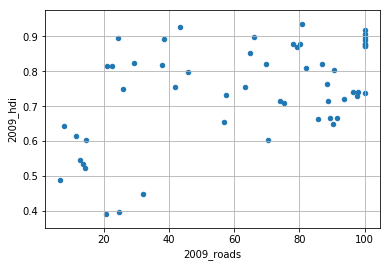

In [75]:
data.plot.scatter(x="2009_roads", y="2009_hdi")
plt.grid(True)

In [76]:
def reta(dados_x, dados_y):    
    a = dados_y.cov(dados_x) / dados_x.var()
    b = dados_y.mean() - a*dados_x.mean()
 
    print('Ajuste linear entre X3 e X4:')
    print('Coeficiente linear:', b)
    print('Coeficiente angular:', a)
 
    fig = plt.figure(figsize=(8, 6))
    plt.scatter(dados_x, dados_y, c='red', alpha=0.8)
    plt.title('x versus y')
    plt.xlabel('eixo x')
    plt.ylabel('eixo y')
 
    plt.plot((dados_x.min(), dados_x.max()), (a*dados_x.min()+b, a*dados_x.max()+b), color='blue')
 
    plt.tight_layout()
    plt.show()

Ajuste linear entre X3 e X4:
Coeficiente linear: 0.5337310726935792
Coeficiente angular: 0.002184993812840174


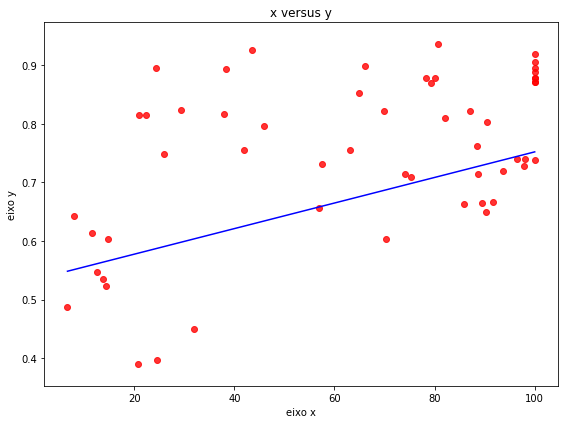

In [80]:
reta(data['2009_roads'], data['2009_hdi'])

In [81]:
data['2009_roads_log'] = np.log(data['2009_roads'])
data['2009_hdi_log'] = np.log(data['2009_hdi'])

Ajuste linear entre X3 e X4:
Coeficiente linear: -1.0469199926520585
Coeficiente angular: 0.1568816088486916


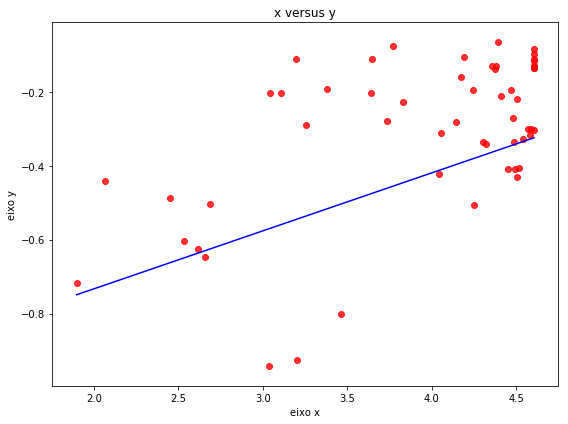

In [82]:
reta(data['2009_roads_log'], data['2009_hdi_log'])